In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns

# set stylle agar grafik lebih bagus
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

LOAD DAN EXPLORE DATA

In [43]:
try:
    # baca file csv dengan memasukkan ke dataframe ( tabel data )
    df = pd.read_csv('C:/Users/test/OneDrive/Desktop/PYTHON/dataset/youtube_recommendation_dataset -.csv')

    # df.shape = (baris, kolom) - untuk emngetahui ukuran dataset
    # contoh (1000, 5 ) berarti ada 1000 video dan 5 kolom info
    print(f"Data loaded succesfully : {df.shape[0]} rows, {df.shape[1]} columns")
except Exception as e:
    pass

Data loaded succesfully : 537 rows, 16 columns


In [44]:
 # display basic info
print("Dataset Info:")
print(df.info()) # lihat tipe data setiap kolom (angka/teks) dan ada missing value atau tidak

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    537 non-null    object 
 1   channel_title            537 non-null    object 
 2   published_at             537 non-null    object 
 3   category_id              537 non-null    int64  
 4   view_count               537 non-null    int64  
 5   like_count               537 non-null    int64  
 6   comment_count            537 non-null    int64  
 7   favorite_count           537 non-null    int64  
 8   duration                 537 non-null    object 
 9   definition               537 non-null    object 
 10  caption                  537 non-null    bool   
 11  engagement_rate          537 non-null    float64
 12  likes_to_views_ratio     537 non-null    float64
 13  comments_to_views_ratio  537 non-null    float64
 14  duration_sec

In [45]:
print("\n first 5 rows : ")
print(df.head())


 first 5 rows : 
                                               Title       channel_title  \
0  LA PERVERSA X LA INSUPERABLE X ALOFOKE MUSIC X...  AlofokeMusicSounds   
1                            Moana | Official Teaser              Disney   
2  $0 - $1 Trillion Only FISHING in Steal a Brain...          CaylusBlox   
3               ALLDAY PROJECT - ‘ONE MORE TIME’ M/V       THEBLACKLABEL   
4      La Lupa | Vendetta Hero Trailer | Overwatch 2       PlayOverwatch   

                published_at  category_id  view_count  like_count  \
0  2025-11-16 15:34:55+00:00           10     1405647      140463   
1  2025-11-17 17:00:47+00:00           24     2776847       26801   
2  2025-11-17 22:57:14+00:00           20     1189857       16174   
3  2025-11-17 09:00:07+00:00           10     5319161           0   
4  2025-11-17 17:00:06+00:00           20      597542       41742   

   comment_count  favorite_count duration definition  caption  \
0           9063               0  PT1M51S    

In [46]:
print("\n statistical summary:")
print(df.describe())    # statistik dasar  : rata-rata, min, max dll


 statistical summary:
       category_id    view_count    like_count  comment_count  favorite_count  \
count   537.000000  5.370000e+02  5.370000e+02     537.000000           537.0   
mean     22.456238  2.145752e+07  4.336044e+05    7125.700186             0.0   
std       5.854776  4.015200e+07  8.386711e+05   36075.115032             0.0   
min       1.000000  0.000000e+00  0.000000e+00       0.000000             0.0   
25%      20.000000  2.676921e+06  5.559100e+04    1018.000000             0.0   
50%      24.000000  6.385911e+06  1.550550e+05    2354.000000             0.0   
75%      27.000000  2.270604e+07  4.631890e+05    5925.000000             0.0   
max      28.000000  3.697310e+08  1.087934e+07  810641.000000             0.0   

       engagement_rate  likes_to_views_ratio  comments_to_views_ratio  \
count       537.000000            537.000000               537.000000   
mean          0.028722              0.027692                 0.001030   
std           0.020608      

In [47]:
# check for missing values
missing = df.isnull().sum()
if missing.any():
    print("missing values detected:")
    print(missing[missing > 0])
    df = df.dropna()   # hapus baris yang ada data ksoongnya
    print(f"dropped mssing values. remaining rows : {df.shape[0]}")

# SIMPLE LINEAR REGRESSION : like_count -> view_count

X = fitur/input ( variabel yang kita pakai untuk prediksi)
y = target / output (variabel yang mau kita prediksi)

analogi : kita mau prediksi nilai ujian (y) berdasarkan jam belajar (X)
          Disni : prediksi view_count (y) berdasarkan like_count(X)

In [48]:
X1 = df[['like_count']].values  # ambil kolom like_count jadi array 2D
y = df[['view_count']].values   # ambil kolom view_counts jadi array 2D

SPLIT DATA : pisah data latihan (80%) dan data testing (20%)
kenapa? supaya kita bisa tes model di data yang belum pernah dilihat
seperti belajar pakai soal latihan, terus digunakan di ujian pakai soal baru


- X1_train = data like_count untuk training (80%)
- X1_test = data like_count untuk testing (20%)
- y_train = data view_count unutk training(80%)
- y_test = data view_ccount untuk testing (20%)


In [49]:
X1_train, X1_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.2, random_state=42
)

print("Data split : ")
print(f"    - Training data : {len(X1_train)} samples, ({len(X1_train)/len(X1)*100:.0f}%)")
print(f"    - Testing data : {len(X1_test)} samples ({len(X1_test)/len(X1)*100:.0f}%)")

Data split : 
    - Training data : 429 samples, (80%)
    - Testing data : 108 samples (20%)


# BUAT MODEL REGRESI LINEAR
- reg1 = obejk model ( seperti "mesin prediksi kita ")
- LinearRegression() = algoritma yang cari garis terbaik y = mx + b

In [50]:
reg1 = LinearRegression()

# TRAINING / FITTING MODEL
- fit() = proses belajar. mdoel cari pola dari data training
- dia cari m (slope) dan b (intercept) yang paling pas

In [51]:
reg1.fit(X1_train, y_train)

LinearRegression()

# HASIL TRAINING
- theta0 (intercept/b) -> nilai y ketika x = 0
- theta1 (slope/m) -> seberapa banyak y naik ketika x naik 1 unit

In [52]:
theta0_1 = reg1.intercept_ # b dalam y = mx + 0
theta1_1 = reg1.coef_[0]

In [53]:
print("Model Equation ( rumus yang ditemukan ) : ")
print(f"view_count = {theta0_1} + {theta1_1} × like_count")
print(f"Interpretasi:")
print(f"    - Base views (ketika like = 0) : {theta0_1}")
print(f"    - setiap 1 like tambahan -> views naik: {theta1_1}")
print(f"    - contoh : video dengan tambahan 1000 likes diprediksi dapat {theta0_1 + theta1_1 *1000} views")

Model Equation ( rumus yang ditemukan ) : 
view_count = [4299525.26653486] + [38.09949231] × like_count
Interpretasi:
    - Base views (ketika like = 0) : [4299525.26653486]
    - setiap 1 like tambahan -> views naik: [38.09949231]
    - contoh : video dengan tambahan 1000 likes diprediksi dapat [4337624.75884906] views


# EVALUASI SIMPLE REGRESSION

# PREDIKSI MENGGUANKAN MODEL YANG SUDAH DI TRAINING
- predict( -> gunakan rumus yang sudah di pelajari untuk tebak nilai baru

In [54]:
y_train_pred = reg1.predict(X1_train)   # prediksi di data training
y_test_pred = reg1.predict(X1_test)     # prediksi di data tesitng (yang belum pernah dilihat)

# Matriks Evaluasi

R² (R-squared): Seberapa bagus model fit ke data (0-1, makin tinggi makin bagus)
- 1.0 = perfect , semua prediksi tepat 100%
- 0.8 = bagus, 80% variasi data bisa dijelaskan model
- 0.5 = lumayan
- 0.0 atau negatif = jelek


## MSE (Mean Squared Error): rata rata kuadrat error ( makin kecil makin bagus)
- Error = selisish prediksi vs actual
- dikuadratkan biar error besar dapat "Hukuman" lebi

## RMSE ( Root Mean Squared Error ) : akar dari MSE ( dalam satuan yang sama denga y )
- lebih mudah di interpretasi karena satuannya sama dengan view_count

## MAE (Mean Absolute Error) :  Rata - Rata error absolut ( lebih simple dari MSE)
- tidak di kuadratkan, jadi lebih mudah dipahami

In [55]:
print(f"\n{'Metrik':<20} {'Training':<15} {'Testing':<15} {'Penjelasan'}")
print("-" * 80)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"{'R² Score':<20} {r2_train:>14.4f} {r2_test:>14.4f}   Model Fit (0-1, ↑ better)")

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"{'MSE':<20} {mse_train:>14,.0f} {mse_test:>14,.0f}   Rata² error² (↓ better)")

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f"{'RMSE':<20} {rmse_train:>14,.0f} {rmse_test:>14.0f}   Rata² error absolut (↓ better)")

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"{'MAE'} {mae_train:>14,.0f} {mae_test:>14,.0f}   Rata² error absolut (↓ better)")


Metrik               Training        Testing         Penjelasan
--------------------------------------------------------------------------------
R² Score                     0.7322         0.3989   Model Fit (0-1, ↑ better)
MSE                  437,587,835,671,270 904,632,819,145,143   Rata² error² (↓ better)
RMSE                     20,918,600       30077115   Rata² error absolut (↓ better)
MAE     10,843,155     13,171,801   Rata² error absolut (↓ better)


In [56]:
# ANALISIS HASIL
print("Kesimpulan")
if r2_test > 0.7:
    print(f"    Model Bagus! R² = {r2_test:.2f} (>0.7)")
elif r2_test > 0.5:
    print(f"    Model Lumayan R² = {r2_test:.2f} (>0.5)")
else:
    print(f"    Model tidak bagus. R² = {r2_test:.2f} (<0.5)")

print(f"    - rata-rata error prediksi : ±{mae_test:,.0f} views")

Kesimpulan
    Model tidak bagus. R² = 0.40 (<0.5)
    - rata-rata error prediksi : ±13,171,801 views


In [57]:
# CEK OVERFITTING/UNDERFITTING
if r2_train- r2_test >0.1:
    print(f"    POSSIBLE OVERFITING ( training jauh lebih bagus dari testing")
elif r2_train <0.5 and r2_test < 0.5:
    print(f"  ⚠ Warning: Possible UNDERFITTING (model terlalu simple)")


    POSSIBLE OVERFITING ( training jauh lebih bagus dari testing


# Visualisasi simple regrresion

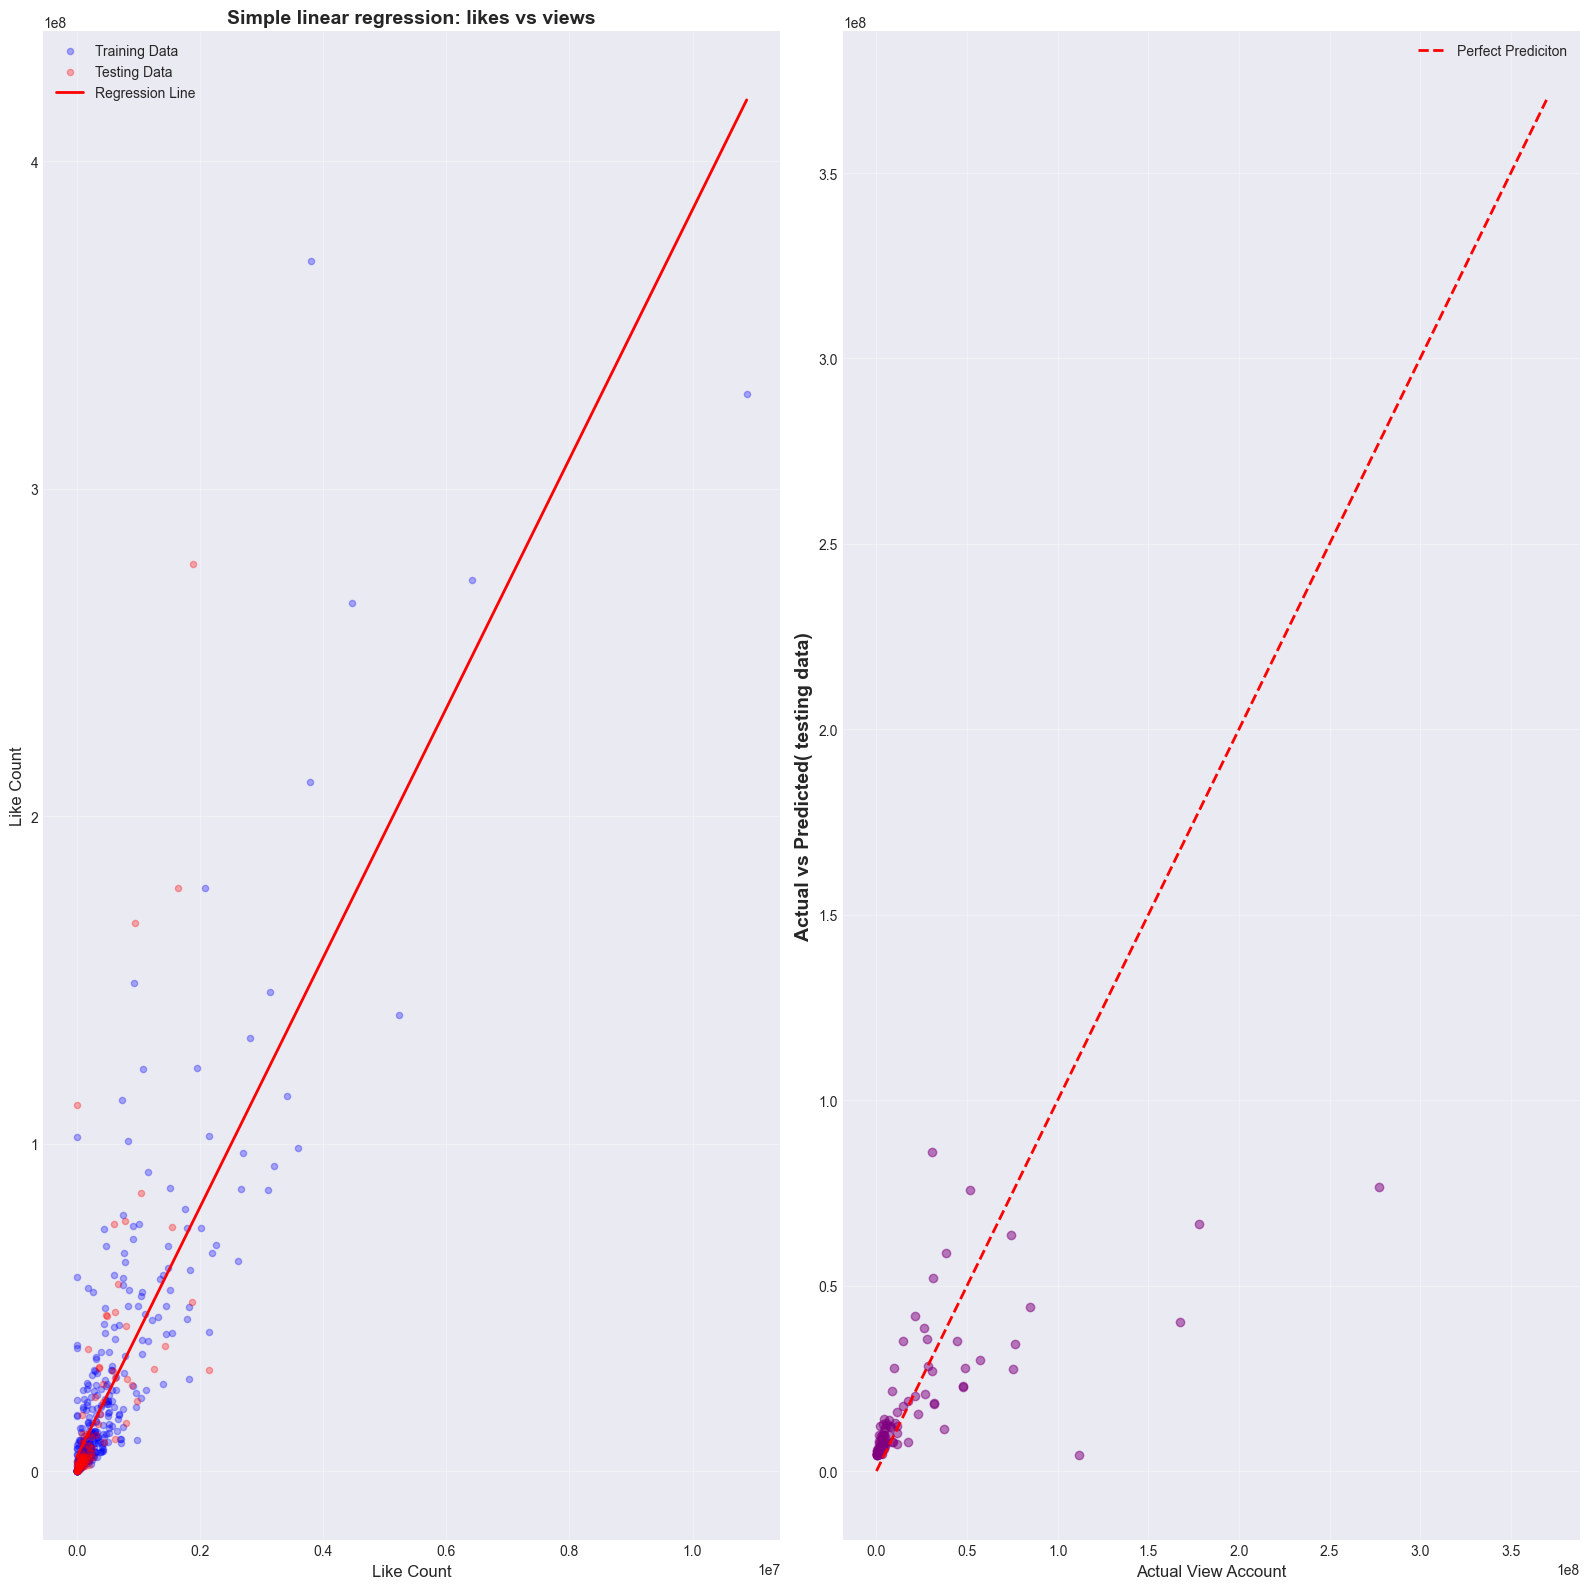

In [58]:
fig, axes = plt.subplots(1,2, figsize=(16,16))

#plot 1 : scatter plot + garis regresi
# scatter = titik tiitik data asli
# garis merah = garis prediksi dari model

axes[0].scatter(X1_train, y_train, alpha=0.3, s=20, label='Training Data', color='blue')
axes[0].scatter(X1_test, y_test, alpha=0.3, s=20, label='Testing Data', color='red')

# buat garis regresi yang smooth
X1_range = np.linspace(X1.min(), X1.max(), 100).reshape(-1,1)
axes[0].plot(X1_range, reg1.predict(X1_range), color='red', linewidth=2, label='Regression Line')

axes[0].set_xlabel('Like Count', fontsize=12)
axes[0].set_ylabel('Like Count', fontsize=12)
axes[0].set_title('Simple linear regression: likes vs views', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2 : actual vs predicted
#plot ini untuk melihat seberapa dekat prediksi kita dengan nilai asli
# jika titik titik dengan dengan garis diagonal = prediksi bagus

axes[1].scatter(y_test, y_test_pred, alpha=0.5, color='purple')
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect Prediciton')
axes[1].set_xlabel('Actual View Account', fontsize=12)
axes[1].set_ylabel('Actual vs Predicted( testing data)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# MULTI FEATURE LINEAR REGRESSION

- SEKARANG PAKAI 3 FITUR SEKALIGUS: LIKE_COUT,  cpmment_count, videos_Age_day
- Rumus jadi: y = b + m1*x1 + m2*x2 + m3*x3
# lebih kompleks tapi biasanya lebih akurat


In [65]:
# cek kolom yang tersedia di dataset
print("Kolom yang tersedia:")
print(df.columns.tolist())

# cek apakah kolom yang dibutuhkan ada
required_cols = ['like_count', 'comment_count', 'video_age_days']
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"\n error : kolom berikut tidak ditemukan di dataset : {missing_cols}")
else:
    X2 = df[['like_count', 'comment_count', 'video_age_days']].values
    print("semua kolom tersedia")

Kolom yang tersedia:
['Title', 'channel_title', 'published_at', 'category_id', 'view_count', 'like_count', 'comment_count', 'favorite_count', 'duration', 'definition', 'caption', 'engagement_rate', 'likes_to_views_ratio', 'comments_to_views_ratio', 'duration_seconds', 'video_age_days']
semua kolom tersedia


In [89]:
# Split data training dan testing
if X2 is not None:
    y = y.ravel()  # pastikan 1D

    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

    # Buat dan training model baru
    reg2 = LinearRegression()
    reg2.fit(X2_train, y2_train)

    print(reg2.coef_)
    print(reg2.coef_.shape)

    print("\nModel Equation:")
    print(f"view_count = {reg2.intercept_}")
    print(f"           + {reg2.coef_[0]:,.4f} × like_count")
    print(f"           + {reg2.coef_[1]:,.4f} × comment_count")
    print(f"           + {reg2.coef_[2]:,.4f} × video_age_days")

    print("Interpretasi koefisien:")
    print(f"    - Base View : {reg2.intercept_:,.0f}")
    print(f"    - Setiap +1 like -> views naik {reg2.coef_[0]:.2f}")
    print(f"    - Setiap 1+ comment - > view naik {reg2.coef_[1]:,.2f}")
    print(f"    - setiap +1 hari view {'naik' if reg2.coef_[2] > 0 else 'turun'} {abs(reg2.coef_[2]):.2f}")
else:
    print("\n⚠️  Multi-feature regression SKIP karena kolom tidak lengkap")
    print("Lanjut ke bagian lain...\n")



[  37.89532771  166.57693553 1064.71095015]
(3,)

Model Equation:
view_count = 2465744.5106257796
           + 37.8953 × like_count
           + 166.5769 × comment_count
           + 1,064.7110 × video_age_days
Interpretasi koefisien:
    - Base View : 2,465,745
    - Setiap +1 like -> views naik 37.90
    - Setiap 1+ comment - > view naik 166.58
    - setiap +1 hari view naik 1064.71


# EVALUASI MULTI-FEATURE MODEL

In [98]:
if X2 is not None:
    y2_train_pred = reg2.predict(X2_train)
    y2_test_pred = reg2.predict(X2_test)

    print(f"\n {'Metrik':<20} {'Training':<15} {'Testing':<15}")
    print("-"*50)
    print(f"{'R² Score':<20} {r2_score(y2_train, y2_train_pred):>14.4f} {r2_score(y2_test, y2_test_pred):>14.4f}")
    print(f"{'MSE':<20} {mean_squared_error(y2_train, y2_train_pred):>14,.0f} {mean_squared_error(y2_test, y2_test_pred):>14,.0f}")
    print(f"{'RMSE':<20} {np.sqrt(mean_squared_error(y2_train, y2_train_pred)):,.0f} {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):14,.0f}")
print(f"{'MAE':<20} {mean_absolute_error(y2_train, y2_train_pred):>14,.0f} {mean_absolute_error(y_test, y_test_pred):>14,.0f}")


 Metrik               Training        Testing        
--------------------------------------------------
R² Score                     0.7347         0.2745
MSE                  433,464,839,909,754 1,091,788,959,416,049
RMSE                 20,819,818     33,042,230
MAE                      10,737,498     13,171,801


# BANDINGKAN DENGAN MODEL SIMPLE

In [108]:
print("PERBANDINGAN MODEL :")
print(f"{'Model':<30} {'R² (Test)':<15} {'RMSE (Test)':<15}")
print("-"*60)
print(f"{'Simple (1 feature)':<30} {r2_test:>14.4f} {rmse_test:>14,.0f}")
print(f"{'Multi ( 3 features)':<30} {r2_score(y2_test, y2_test_pred):>14.4f} {np.sqrt(mean_squared_error(y2_test, y2_test_pred)):>14,.0f}")

improvment = r2_score(y2_test, y2_test_pred) - r2_test
print(f"\n {'Improvement:':<30} {improvment:>+14.4f} ({improvment*100:+.1f}%)")

PERBANDINGAN MODEL :
Model                          R² (Test)       RMSE (Test)    
------------------------------------------------------------
Simple (1 feature)                     0.3989     30,077,115
Multi ( 3 features)                    0.2745     33,042,230

 Improvement:                          -0.1244 (-12.4%)


# VISUALISASI MULIT-FEATURE

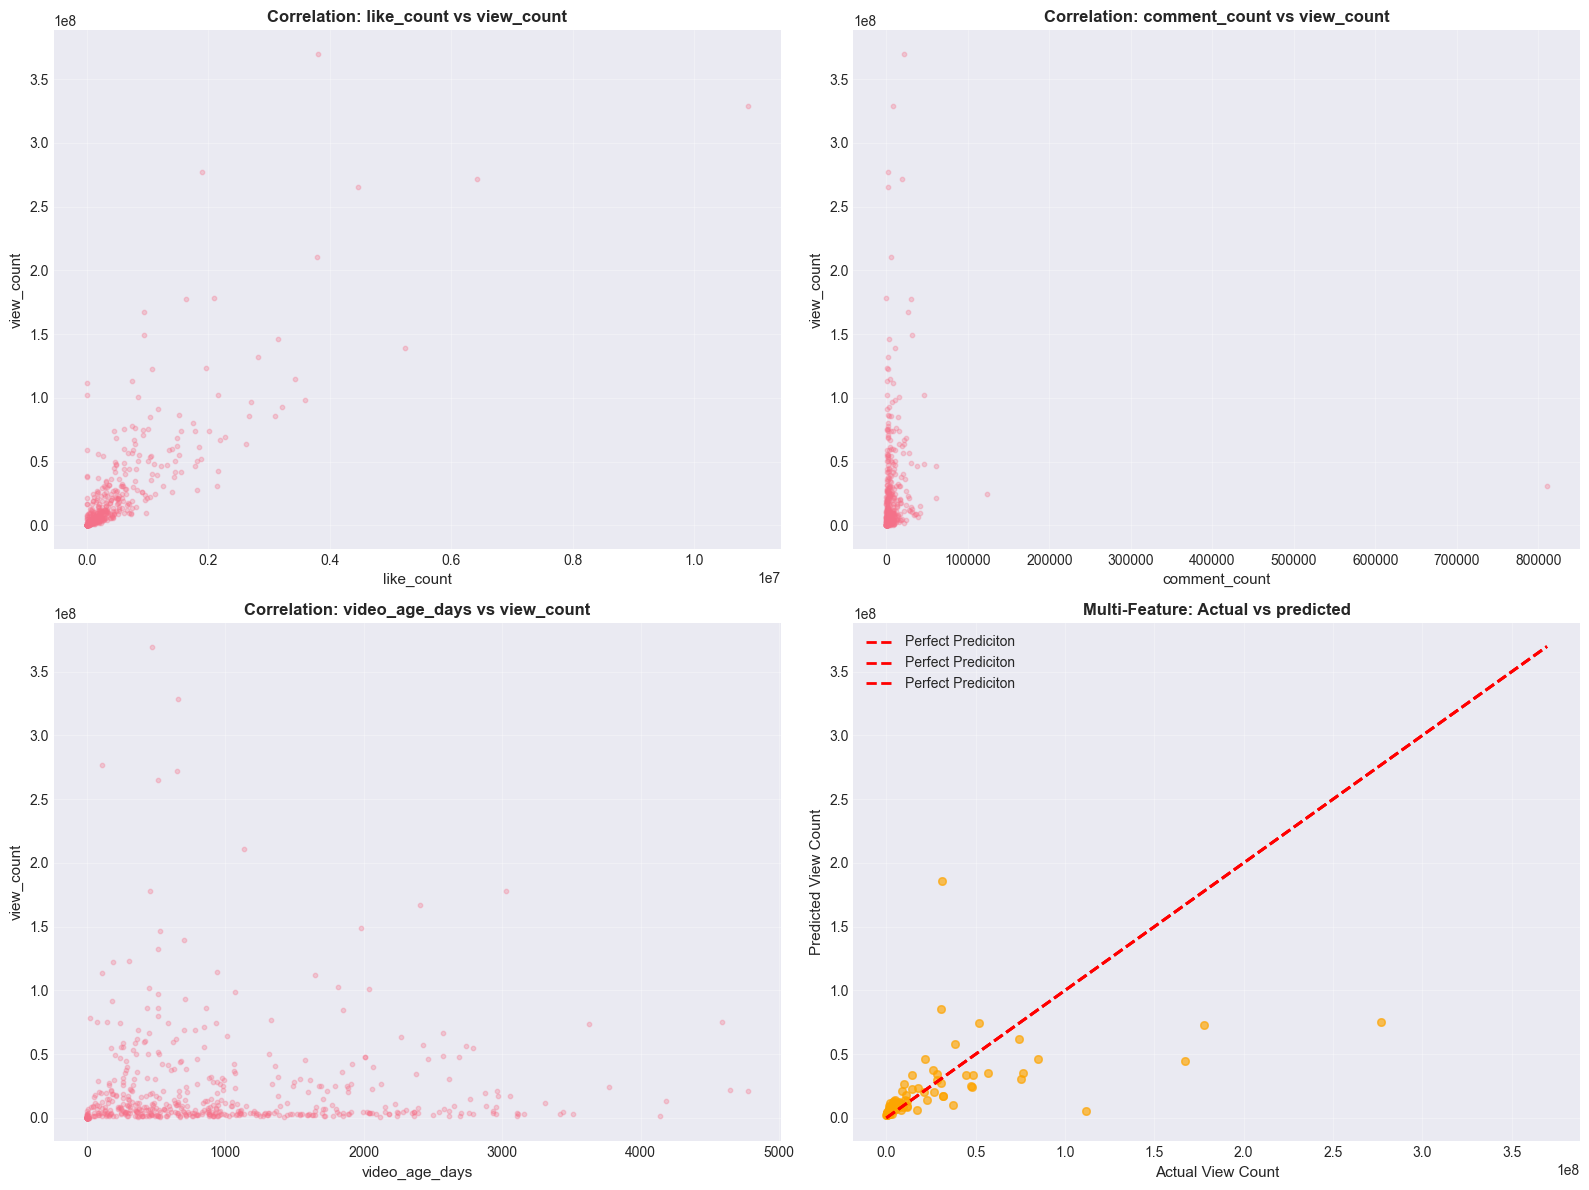

In [118]:
if X2 is not None:
    fig, axes = plt.subplots(2,2, figsize=(16,12))

    # plot korelasi setiap fitur dengan target
    features = ['like_count', 'comment_count', 'video_age_days']
    for idx, feature in enumerate(features):
        row = idx // 2
        col = idx % 2
        axes[row, col].scatter(df[feature], y , alpha=0.3, s=10)
        axes[row, col].set_xlabel(feature, fontsize=11)
        axes[row,col].set_ylabel('view_count', fontsize=11)
        axes[row, col].set_title(f'Correlation: {feature} vs view_count', fontsize=12,fontweight='bold')
        axes[row, col].grid(True, alpha=0.3)

        # plot actual vs predicted untuk multi feature
        axes[1,1].scatter(y2_test, y2_test_pred, alpha=0.3, s=30, color='orange')
        axes[1,1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect Prediciton')
        axes[1,1].set_xlabel('Actual View Count', fontsize=11)
        axes[1,1].set_ylabel('Predicted View Count', fontsize=11)
        axes[1,1].set_title('Multi-Feature: Actual vs predicted', fontsize=12, fontweight='bold')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# contoh prediksi

In [124]:
if X2 is not None:
    examples = [
        [10000, 500, 2], # video pupuler, baru upload
        [1000,50,30],   # video bisasa , sudah lama
        [50000,2000,1],
    ]

    print(f"\n {'Likes':<10} {'Comments':<10} {'Age (days)':12} {'Predicted Views':<20}")
    print('='*55)

    for example in examples:
        pred_views = int(reg2.predict([example])[0])
        print(f"{example[0]:<10} {example[1]:<10} {example[2]:<12} {pred_views:>19,}")
    else:
        print("PREDIKSI MULTI FEATURE DI SKIP KARENA KOLOM TIDAK LENGKAP")

        print("Contoh prediksi pakai model simple (cuma pakai like_count):")
        examples_simple = [10000, 1000, 50000]
        print(f"\n{'Likes':<15} {'Predicted Views':<20}")
        print("-" * 35)
        for likes in examples_simple:
            pred_views = int(reg1.predict([[likes]])[0])
            print(f"{likes:<15} {pred_views:>19,}")



 Likes      Comments   Age (days)   Predicted Views     
10000      500        2                      2,930,115
1000       50         30                     2,543,910
50000      2000       1                      4,694,729
PREDIKSI MULTI FEATURE DI SKIP KARENA KOLOM TIDAK LENGKAP
Contoh prediksi pakai model simple (cuma pakai like_count):

Likes           Predicted Views     
-----------------------------------
10000                     4,680,520
1000                      4,337,624
50000                     6,204,499


C:\Users\test\Downloads\mingw-w64-ucrt-x86_64-gcc-15.2.0-8-any.pkg\ucrt64\bin\ipykernel_26672\301991838.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_views = int(reg1.predict([[likes]])[0])
C:\Users\test\Downloads\mingw-w64-ucrt-x86_64-gcc-15.2.0-8-any.pkg\ucrt64\bin\ipykernel_26672\301991838.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_views = int(reg1.predict([[likes]])[0])
C:\Users\test\Downloads\mingw-w64-ucrt-x86_64-gcc-15.2.0-8-any.pkg\ucrt64\bin\ipykernel_26672\301991838.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a 

# RINGKASAN

## APA ITU MACHINE LEARNING?

Machine learning = komputer belajar dari data tanpa di porgram secara eksplisit

analogi sederhana:
- belajar matematika : lihat soal _> dapat pola _> bisa kerjakan soal baru
- machine learning : lihat banyak data _> dapat pola -> bisa prediksi data baru

## REGRESI LINIEAR
konsep : Cari gatis lurus terbaik yang "fit"" ke data
rumus : y = b + mx atau y = thetha0 + theta1*x

contoh real life:
- prediksi harga rumah dari luas tannah
- prediksi gaji dari tahun pengalaman
- prediksi nilai ujian dari jam belajar
- prediksi views yt dari like

# ISTILAH PENTING

## X (features/input)
- data yang kita pakai untuk prediksi
- contoh : like_count, comment_count, videp_age_Days

## y (Target/output)
- data yang mau kita prediksi
- contoh = view_count

## Training data :
- data untuk mengajari model ( 80% baisanya)
- model belajar pola di sini

## testing data :
- data untuk mengetes model (20%  biasanya)
- data yang belum pernah dilihat model saat training
- untuk cek apakah model benar benar pintar atau cuma hafalan

## Model (.fit())
- porses belajar dari training data
- cari nilai theta 0 dan theta 1 paling tinggi

## prediction (.predict())
- pakai model yang sudah belajar untuk tebak nilai baru

## coefficients (theta.koefisien):
- theta0 ( intercept ) = nilai y ketika x = 0
- theta1 ( slope ) = seberapa banyak y berubah ketika x naik 1 unit

# Matrik Evaluasi
 R² (R-squared) - Range: -∞ sampai 1
 Seberapa bagus model menjelaskan variasi data

-  R² = 1 - (SS_res / SS_tot)
- SS_res = jumlah kuadrat error prediksi
- SS_tot = jumlah kuadrat deviasi dari rata rata
- 1.0 = sempurna. model fit 100% ke data ( sangat jarang terjadi )
- 0.9 = sangat bagus (9-% variasi data dapat dijelaskan model )
- 0.7 = bagus ( 70% variasi dijelaskan)
- 0.5 = lumayan ( 50% variasi dijelaskan)
- 0.3 = kurang bagus ( cuma 30% variasi dijelaskan
- 0.0 = model sama jeleknya dengan tebak pakai rata rata
- <0.0 = jelek abnget ( model lebih jelek dari tebakan rata rata )

## penting  PENTING: R² = 1.0 BUKAN berarti prediksi 100% tepat!
      R² = 1.0 artinya semua titik data ada di garis regresi.
      Tapi garis regresi sendiri bisa aja salah polanya!

## MSE ( MEAN SQUARED ERROR )
- Rata-Rata Kuadrat selisih prediksi vs aktual
- Makin kecil makin bagus (0 = perfect )

## RMSE (ROOT MEAN SQUARED ERROR)
- akar dari MSE, satuannya sama dengan y
- lebih mudah dipahami : "rata rata error sekitar x views"

## MAE ( MEAN ABSOLUTE ERROR)
- rata rata error absolut ( tidak di kuadratkan)
- contoh = MAE = 1000 artinya rata rata meleset 1000 views

# OVERVITING VS UNDERFITTING

## OVERFITING
- model "hafal" training data tapi gagal di data baru
- tanda : training score tinggi, testing score rendah
- solusi : tambah data, simply model, regularization
- analogy : siswa hafal kunci jawaban, tapi ga paham komnsep

## uUNDERFITTING
- model terallalu simple, tidak bisa menagngkap pola
- tanda : training dan testing score sama sama rendah
- solusi : tambah fitur, pakai mdoel lebih kompleks
- analogy : sisswa belajar cuma 5 menit buat ujia 100 soal

# KAPAN PAKAI REGRESI LINEAR

## BAGUS UNTUK :
- hubungan linear ( garis lurus )
- prediksi nilai kontinu ( harga, suhu, jumlah, dll)
- interpretasi mudah ( lihat koefisien langsung paham)
- dataset kecil-menengah

## KURANG BAGUS UNTUK :
- hubungan non-linear ( parabola, eksponensial, dll )
- klasifikasi ( prediksi kategori : spam/ham, kucing/anjing)
- banyak fitur yang ga relevan
- data dengan outlier ekstream

# string formating (f-string)

## angka desimal:
- .2f = 2 angka di belakang koma        -> 3.14
- .4f = 4 angka di belakang koma        -> 4.1416
- .0f = tanpa desimal ( dibulatkan)     -> 3

## thousand separator:

,       = pakai tanda koma sebagai pemisah ribuan
- views = 1234567
- print(f"{views:,}")       # output 1,234,567
- print(f"{views:,.0f}")     # Output: 1,234,567 (float dibulatkan)
- print(f"{views:,.2f}")     # Output: 1,234,567.00

# ALIGNMENT ( PERATAAN TEKS)
- <    = rata kiri
- >    = rata kanan
- ^    = rata tengah
- Contoh:
- name = "Claude"
- print(f"{name:<10}")   # Output: "Claude    " (kiri, lebar 10)
- print(f"{name:>10}")   # Output: "    Claude" (kanan, lebar 10)
- print(f"{name:^10}")   # Output: "  Claude  " (tengah, lebar 10)

## KOMBINASI:
-  :>14,.0f  = rata kanan, lebar 14, separator ribuan, tanpa desimal
- :<20      = rata kiri, lebar 20
- :>14.4f   = rata kanan, lebar 14, 4 desimal
- :+.1f     = tampilkan tanda +/-, 1 desimal

Contoh lengkap:
- price = 1234567.891
- print(f"{price:>15,.2f}")     # Output: "  1,234,567.89"
- improvement = 0.05
- print(f"{improvement:+.1f}%") # Output: "+0.1%" atau "-0.1%"

📌 CONTOH DI KODE INI:
- {theta0_1:,.2f}          → 12345.67 menjadi "12,345.67"
- {theta1_1:.4f}           → 0.123456 menjadi "0.1235"
- {r2_test:>14.4f}         → 0.8567 menjadi "        0.8567" (rata kanan)
- {mae_test:>14,.0f}       → 1234567 menjadi "     1,234,567"

# TIPS

## SELALU VISUALISASI DATA DULU SEBELUM MODELING
- LIHAT SCATTER PLOT, APAKA ADA POLA LINEAR

## SPLIT DATA TRAING/TESTING SELALU
- JANGAN EVALUATE DI DATA YANG SAMA DENGAN TRAINING

## CEK OVERFITTING DAN BANDINGKAN DENGAN TRAINING VS TESTING SCORE
- KALAU BEDA JAUH = OVERFITTING

## MULAI DARI MODEL SIMPLE DULLU
- COBA  1 FITUR, BARU TAMBAH FITUR KALAU PERLU

##   INTERPRETASI hasil, jangan cuma lihat angka
- R² tinggi belum tentu model bagus (bisa overfitting)

## DOMAIN KNOWLEDGE ( PENTING)
- PAHAM BISNIS/KONTEKS -> PILIH FITUR YANG RELEVAN

## PELAJARI STRING FORMATING UNTUK OUTPUT YANG RAPI!
